In [1]:
!gdown --id 1KASGYBqpi2BmtIeRbFKbttXfIoSgMhY5
!unzip truevoice-intent.zip

Downloading...
From: https://drive.google.com/uc?id=1KASGYBqpi2BmtIeRbFKbttXfIoSgMhY5
To: /content/truevoice-intent.zip
100% 614k/614k [00:00<00:00, 82.3MB/s]
Archive:  truevoice-intent.zip
  inflating: mari_train.csv          
  inflating: mari_test.csv           


In [2]:
# import lib
import numpy as np
import pandas as pd

# Load data

In [3]:
def load_data():
  train_df = pd.read_csv('mari_train.csv')
  test_df = pd.read_csv('mari_test.csv')
  return train_df, test_df

In [4]:
train_df, test_df = load_data()

In [5]:
train_df.head()

,texts,texts_deepcut,action,object,destination
0,ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต . บ...,ผม ไป จ่าย เงิน ที่ Counter Services เค้า เช็...,enquire,payment,billing and payment
1,internet ยังความเร็วอยุ่เท่าไหร ครับ,internet ยัง ความ เร็ว อยุ่ เท่า ไหร ครับ,enquire,package,promotions
2,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,ตะกี้ ไป ชำระ ค่า บริการ ไป แล้ว แต่ ยัง ใช้ ...,report,suspend,billing and payment
3,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,พี่ ค่ะ ยัง ใช้ internet ไม่ ได้ เลย ค่ะ เป็น...,enquire,internet,internet
4,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,ฮาโหล คะ พอดี ว่า เมื่อ วาน เปิด ซิม ทรูมูฟ แ...,report,phone_issues,billing and payment


In [6]:
# ดู Destination ว่ามีหัวข้ออะไรบ้าง
train_df['destination'].value_counts()/len(train_df)

billing and payment      0.386970
promotions               0.242600
other queries            0.172888
internet                 0.143906
international dialing    0.025968
true money               0.015534
lost and stolen          0.012134
Name: destination, dtype: float64

In [7]:
#สุ่มมาดูว่า text เขาต้องการอะไร
train_df['texts'].values[20]

' หมายเลขนี้โดนระงับบริการเหรอค่ะ'

# Feature Extraction

In [8]:
# import lib ที่ไว้ใช้จัดการข้อมูล text ที่เป็นภาษาไทย
!pip install pythainlp -q

     |████████████████████████████████| 13.1MB 326kB/s 
     |████████████████████████████████| 747kB 56.2MB/s 


#### Word tokenization
การตัดคำ

In [9]:
# สิ่งแรกของการทำ NLP คือการทำ Word tokenization(ตัดคำ)
#เรียกใช้ funtion ใน word_tokenize
from pythainlp import word_tokenize

In [10]:
#สร้าง funtion
def get_th_tokens(text):
  # text = text.replace(' ','')
  # text = text.replace('\n', '')
  tokens = word_tokenize(text, engine='newmm') # engine คือเราจะตัดคำด้วยวิธีไหน
  return tokens

http://thainlp.org/pythainlp/docs/2.0/api/tokenize.html

In [11]:
get_th_tokens('ฉันไปโรงเรียน') # ลองใส่ text ลงไป

['ฉัน', 'ไป', 'โรงเรียน']

In [12]:
len(get_th_tokens('ฉันไปโรงเรียน'))

3

In [13]:
get_th_tokens('ผมหิวข้าวจังเลย5555')

['ผม', 'หิวข้าว', 'จัง', 'เลย', '5555']

#### Bag of words (BOW)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# กำหนดคำที่จะทำ bow ขึ้นมา
data = ['ฉันไปโรงเรียน', 'โรงเรียนของเราน่าอยู่', 'คุณครูใจดีทุกคน', 'ฉันกินปลา', 'ปลากินฉัน']

In [16]:
# train vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
vectorizer.get_feature_names() #ตัวนี้เราไม่ได้บอกว่าตัดแบบไหน เดิมใช้กับภาษาอังกิด เลยจะออกมาแปลกๆ

['กคน',
 'ณคร',
 'นก',
 'นฉ',
 'นปลา',
 'นไปโรงเร',
 'ปลาก',
 'ยน',
 'ยนของเราน',
 'าอย',
 'โรงเร',
 'ใจด']

In [18]:
# train vectorizer
vectorizer = CountVectorizer(tokenizer=get_th_tokens)
vectorizer.fit(data)
vectorizer.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['กิน',
 'ของ',
 'คุณครู',
 'ฉัน',
 'ทุกคน',
 'น่าอยู่',
 'ปลา',
 'เรา',
 'โรงเรียน',
 'ใจดี',
 'ไป']

In [19]:
bow = vectorizer.transform(data).toarray()
df = pd.DataFrame(bow, columns= vectorizer.get_feature_names())
df['text'] = data
df

,กิน,ของ,คุณครู,ฉัน,ทุกคน,น่าอยู่,ปลา,เรา,โรงเรียน,ใจดี,ไป,text
0,0,0,0,1,0,0,0,0,1,0,1,ฉันไปโรงเรียน
1,0,1,0,0,0,1,0,1,1,0,0,โรงเรียนของเราน่าอยู่
2,0,0,1,0,1,0,0,0,0,1,0,คุณครูใจดีทุกคน
3,1,0,0,1,0,0,1,0,0,0,0,ฉันกินปลา
4,1,0,0,1,0,0,1,0,0,0,0,ปลากินฉัน


In [20]:
#ข้อเสียของการทำ bow มันแปลงเป็นเวกเตอร์เดียว [ฉันกินปลา,ปลากินฉัน] แต่ความจริงคือคนละความหมาย

In [21]:
vectorizer.transform(['โรงเรียนไปโรงเรียน']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1]])

#### Bag of words (BOW) - N grams

In [22]:
vectorizer = CountVectorizer(tokenizer=get_th_tokens, ngram_range=(2,2))
vectorizer.fit(data)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function get_th_tokens at 0x7f31950880d0>,
                vocabulary=None)

In [46]:
vectorizer.get_feature_names()

['\n',
 '\n  ',
 '\n true',
 '\n กับ',
 '\n กาแล็กซี่',
 '\n ขอ',
 '\n ของ',
 '\n ครับ',
 '\n คือ',
 '\n คุย',
 '\n ค่า',
 '\n ค่าใช้จ่าย',
 '\n จะ',
 '\n จี',
 '\n ชำระ',
 '\n ดังกล่าว',
 '\n ดึง',
 '\n ตอนนี้',
 '\n ติด',
 '\n ต้อง',
 '\n ต้องการ',
 '\n ถูก',
 '\n ถ้า',
 '\n ทรู',
 '\n ทรูมูฟ',
 '\n ทั้งที่',
 '\n ทั้งสิ้น',
 '\n ทีนี้',
 '\n ที่',
 '\n บอ',
 '\n ผม',
 '\n พน',
 '\n มัน',
 '\n มีปัญหา',
 '\n ยัง',
 '\n ยังอยู่',
 '\n ยืนยัน',
 '\n ยู',
 '\n ย้าย',
 '\n รบกวน',
 '\n รายละเอียด',
 '\n ลอง',
 '\n ว่า',
 '\n สนใจ',
 '\n สามารถ',
 '\n ส่ง',
 '\n ส่วนลด',
 '\n อยาก',
 '\n อยากได้',
 '\n อย่าง',
 '\n อัล',
 '\n อา',
 '\n อินเตอร์เน็ต',
 '\n เกิด',
 '\n เครื่อง',
 '\n เค้า',
 '\n เงิน',
 '\n เติม',
 '\n เนื่องจาก',
 '\n เปลี่ยน',
 '\n เป็น',
 '\n เป็นระบบ',
 '\n เพราะ',
 '\n เมื่อวาน',
 '\n เรียบร้อย',
 '\n เล่น',
 '\n เวลา',
 '\n แต่',
 '\n แต่ว่า',
 '\n แพ็กเกจ',
 '\n แพ็คเกจ',
 '\n และ',
 '\n แล้',
 '\n แล้ว',
 '\n แล้วก็',
 '\n โทร',
 '\n โปรโมชั่น',
 '\n ใช้',
 '\n ใช้ไ

In [47]:
bow = vectorizer.transform(data).toarray()
df = pd.DataFrame(bow, columns= vectorizer.get_feature_names())
df['text'] = data
df

,\n,\n,\n true,\n กับ,\n กาแล็กซี่,\n ขอ,\n ของ,\n ครับ,\n คือ,\n คุย,\n ค่า,\n ค่าใช้จ่าย,\n จะ,\n จี,\n ชำระ,\n ดังกล่าว,\n ดึง,\n ตอนนี้,\n ติด,\n ต้อง,\n ต้องการ,\n ถูก,\n ถ้า,\n ทรู,\n ทรูมูฟ,\n ทั้งที่,\n ทั้งสิ้น,\n ทีนี้,\n ที่,\n บอ,\n ผม,\n พน,\n มัน,\n มีปัญหา,\n ยัง,\n ยังอยู่,\n ยืนยัน,\n ยู,\n ย้าย,\n รบกวน,...,่ง หนึ่ง,้,้ แล้ว,์,์,์ ของ,์ ตัว,์ ตั้งแต่,์ ที่,์ มัน,์ มา,์ หรือ,์ เซ,์ เซอร์,์ เซอร์วิส,์ เต,์ เน็ต,์ แคร์,์ โบนัส,์ โลตัส,์ ได้,์ ไป,์ร,์ร ทรู,์ล,์ล โหลด,์เนต,์เนต ได้,์เนตผม,์เนตผม ใช้ไม่ได้,“,“ โปร,”,”,…,….,….,…..,….. ค่ะ,text
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ฉันไปโรงเรียน
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,โรงเรียนของเราน่าอยู่
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,คุณครูใจดีทุกคน
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ฉันกินปลา
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ปลากินฉัน


In [48]:
vectorizer = CountVectorizer(tokenizer=get_th_tokens, ngram_range=(1,2))
vectorizer.fit(data)
vectorizer.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['กิน',
 'กิน ฉัน',
 'กิน ปลา',
 'ของ',
 'ของ เรา',
 'คุณครู',
 'คุณครู ใจดี',
 'ฉัน',
 'ฉัน กิน',
 'ฉัน ไป',
 'ทุกคน',
 'น่าอยู่',
 'ปลา',
 'ปลา กิน',
 'เรา',
 'เรา น่าอยู่',
 'โรงเรียน',
 'โรงเรียน ของ',
 'ใจดี',
 'ใจดี ทุกคน',
 'ไป',
 'ไป โรงเรียน']

#### Extract BOW feature

In [49]:
train_data = train_df['texts']
test_data = test_df['texts']

train_label = train_df['destination']
test_label = test_df['destination']

In [27]:
# Train vectorizer
vectorizer = CountVectorizer(tokenizer=get_th_tokens, ngram_range=(1,2))
vectorizer.fit(train_data)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function get_th_tokens at 0x7f31950880d0>,
                vocabulary=None)

In [28]:
# Create BOW feature
train_feat = vectorizer.transform(train_data)
test_feat = vectorizer.transform(test_data)

In [29]:
train_feat

<12939x32541 sparse matrix of type '<class 'numpy.int64'>'
	with 322848 stored elements in Compressed Sparse Row format>

In [30]:
train_feat.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Train model

In [31]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize

In [32]:
# L2 Normalization
train_feat_norm = normalize(train_feat)
test_feat_norm = normalize(test_feat)

In [33]:
model = LinearSVC(random_state=0)

In [34]:
model.fit(train_feat_norm, train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

# Evaluation

In [35]:
from sklearn.metrics import classification_report, accuracy_score

In [36]:
pred = model.predict(test_feat_norm)

In [37]:
print(classification_report(test_label, pred, digits=3))

                       precision    recall  f1-score   support

  billing and payment      0.816     0.913     0.862       977
international dialing      0.925     0.906     0.915       203
             internet      0.857     0.907     0.882       615
      lost and stolen      1.000     0.934     0.966       196
        other queries      0.834     0.658     0.735       549
           promotions      0.926     0.897     0.911       590
           true money      0.972     0.972     0.972       106

             accuracy                          0.868      3236
            macro avg      0.904     0.884     0.892      3236
         weighted avg      0.870     0.868     0.866      3236



In [38]:
accuracy_score(test_label, pred)

0.8683559950556242

In [39]:
def pipline():
  # Load data
  train_df = pd.read_csv('mari_train.csv')
  test_df = pd.read_csv('mari_test.csv')

  # Split data
  train_data = train_df['texts']
  test_data = test_df['texts']

  train_label = train_df['destination']
  test_label = test_df['destination']

  # Extract feature
  ## Train vectorizer
  vectorizer = CountVectorizer(tokenizer=get_th_tokens, ngram_range=(1,2))
  vectorizer.fit(train_data)

  ## Create BOW feature
  train_feat = vectorizer.transform(train_data)
  test_feat = vectorizer.transform(test_data)

  ## Normalization
  train_feat_norm = normalize(train_feat)
  test_feat_norm = normalize(test_feat)

  # Train model
  model = LinearSVC(random_state=0)
  model.fit(train_feat_norm, train_label)

  # Prediction
  pred = model.predict(test_feat_norm)

  # Evaluation
  acc = accuracy_score(test_label, pred)

  return acc



In [40]:
pipline()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.8683559950556242

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
def pipline2():
  # Load data
  train_df = pd.read_csv('mari_train.csv')
  test_df = pd.read_csv('mari_test.csv')

  # Split data
  train_data = train_df['texts']
  test_data = test_df['texts']

  train_label = train_df['destination']
  test_label = test_df['destination']

  # Extract feature
  ## Train vectorizer
  vectorizer = TfidfVectorizer(tokenizer=get_th_tokens, ngram_range=(1,2))
  vectorizer.fit(train_data)

  ## Create BOW feature
  train_feat = vectorizer.transform(train_data)
  test_feat = vectorizer.transform(test_data)

  ## Normalization
  train_feat_norm = normalize(train_feat)
  test_feat_norm = normalize(test_feat)

  # Train model
  model = LinearSVC(random_state=0)
  model.fit(train_feat_norm, train_label)

  # Prediction
  pred = model.predict(test_feat_norm)

  # Evaluation
  acc = accuracy_score(test_label, pred)

  return acc

pipline2()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.8624845488257108

In [43]:
train_data.head()

0     ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต . บ...
1                 internet ยังความเร็วอยุ่เท่าไหร ครับ
2     ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...
3     พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...
4     ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...
Name: texts, dtype: object

In [44]:
len_text = train_data.apply(len)

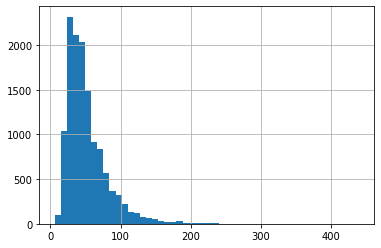

In [45]:
len_text.hist(bins=50)